# 💔 Сердечная недостаточность - Бинарная классификация

In [1]:
# System Imports
import os

# Data Processing
import numpy as np
import pandas as pd
import scipy.stats as sts

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


## 1️⃣ ( `30` ) Домашнее задание

1. 🟥 ( `8` ) Формулирование и постановка задачи
   1. 🟥 ( `3` ) Сформулирована бизнес-постановка задачи.
   2. 🟥 ( `2` ) Сформулирована ML-постановка задачи.
   3. ❓ ( `3` ) Представлен набор данных, достаточный для решения поставленной задачи.
2. 🟥 ( `8` ) Метрики
   1. 🟥 ( `3` ) Предложена метрика для оценки модели машинного обучения.
   2. 🟥 ( `5` ) Присутствует корректное обоснование использования метрики (или набора метрик).
3. 🟨 ( `14` ) EDA анализ данных
   1. ❓ ( `3` ) Рассмотрены базовые хакарктеристики/статистики для набора данных.
   2. ❓ ( `5` ) Реализованы наиболее релевантные визуализации.
   3. 🟩 ( `6` ) По ходу работы присутствуют комментарии. Вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, визуализации, расcчитанные статистики, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп
   
📚 **Дополнительные материалы:**
1. https://habr.com/ru/company/jetinfosystems/blog/420261/

## Описание задачи


**Бизнес-постановка задачи** \
В условиях растущей заболеваемости сердечно-сосудистыми заболеваниями, организация здравоохранения стремится улучшить диагностику и профилактику сердечных приступов. Для этого необходимо разработать модель машинного обучения, которая будет определять будет ли сердечный приступ у пациентов на основе их медицинских данных

**Постановка задачи анализа данных** \
Необходимо проанализировать данные найти показатели, которые могут дать зависимости от друг друга

**Метрики** 

**F1-score** - метрика поможет найти баланс между минимизацией ложных срабатываний и ложных отрицаний

Ложные отрицания (когда модель не предсказывает сердечный приступ, хотя он действительно есть) могут иметь серьезные последствия, так как это может привести к отсутствию необходимого лечения и, как следствие, к ухудшению состояния пациента или даже к летальному исходу 


Ложные срабатывания (когда модель предсказывает сердечный приступ, хотя его нет) также нежелательны, так как могут привести к ненужным медицинским вмешательствам и стрессу для пациента 

**ROC-AUC** - поможет оценить как модель различает классы

Значение ROC-AUC близкое к 1 указывает на то, что модель хорошо различает классы, что критично для медицинских приложений, где точность диагностики может спасти жизни

**Данные** \
В репозитории 2 файла:

heart.csv \
o2Saturation.csv

**Колонки:**

| Колонка | Описание | Значения |
| --- | --- | --- |
| age | Возраст пациента |  |
| sex | Пол пациента | 0 - муж 1 - жен |
| cp | Тип боли в груди | 0 - Типичная ангина, 1  - Нетипичная ангина, 2 - Неангинальная боль, 3 - Асимптоматическая |
| trtbps |  артериальное давление в состоянии покоя |  |
| chol | Уровень холестерина в сыворотке крови в мг/дл |  |
| fbs | Уровень сахара в крови натощак | 1 = верно; 0 = неверно |
| restecg | Результаты электрокардиографии в состоянии покоя | Значение 0 -  в норме, Значение 1 -  наличие аномалии зубца ST-T (инверсия зубца T и/или подъем или депрессия сегмента ST > 0,05 мВ), Значение 2 - наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса |
| thalach | Максимальная частота сердечных сокращений |  |
| exng | Стенокардия, вызванная физической нагрузкой | 1 - да, 0 - нет |
| oldpeak | Депрессия ST, вызванная физической нагрузкой, по сравнению с отдыхом |  |
| slp | Наклон сегмента ST пикового при упражнениях |  |
| caa |Кол-во крупных сосудов  | 0-3 |
| thall |  | 3 = Нормальный; 6 = Исправленный дефект; 7 = Устраняемый дефект |
| output | Предсказание |  |

# EDA

In [2]:
# Load the heart.csv data
PATH = os.getcwd() + '/'
filename = 'heart.csv'
data = pd.read_csv(PATH + filename)

# Выводим информацию о датасете
sizes = data.shape
empty = data.isnull().sum().sum()
print(f"Размерность данных: {sizes}")
print(f"Пропусков в данных: {empty}")
print()
data.info()

Размерность данных: (303, 14)
Пропусков в данных: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Количество уникальных значений

In [5]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["уникальные значения"]).transpose()

,уникальные значения
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Графики и наблюдения

In [6]:
# Исходные данные
trtbps_data = pd.read_csv('/Users/daryaarestova/dev/LW-ML-for-Science/heart.csv')['trtbps'].values


In [7]:
#Статистические параметры
mean = np.mean(trtbps_data)
median = np.median(trtbps_data)
std_dev = np.std(trtbps_data)
skewness = stats.skew(trtbps_data)
kurtosis = stats.kurtosis(trtbps_data)

# Фигура
plt.figure(figsize=(7, 7))

# Гистограмма с оценкой плотности
n, bins, _ = plt.hist(trtbps_data, bins=30, density=True, alpha=0.7, color='black', edgecolor='black', label='Histogram')
kde = stats.gaussian_kde(trtbps_data)
x_range = np.linspace(trtbps_data.min(), trtbps_data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', lw=2, label='Kernel Density Estimation')

# Вертикальные линии для среднего и медианы
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('Артериальное давление в состоянии покоя')
plt.ylabel('Плотность')
plt.title('Гистограммный анализ артериального давления в состоянии покоя')
plt.legend()
plt.grid(True, alpha=0.3)

# Текстовый блок с описанием статистики
stats_text = (
    f'Mean: {mean:.2f}\n'
    f'Median: {median:.2f}\n'
    f'Std Dev: {std_dev:.2f}\n'
    f'Skewness: {skewness:.2f}\n'
    f'Kurtosis: {kurtosis:.2f}'
)

# Аннотация для самой высокой частоты
max_count_index = np.argmax(n)
max_count = n[max_count_index]
max_bin = (bins[max_count_index] + bins[max_count_index + 1]) / 2
plt.annotate(f'Highest frequency:\n{max_bin:.2f} mmHg',
             xy=(max_bin, max_count), xytext=(max_bin + 10, max_count),
             arrowprops={'facecolor': 'black', 'shrink': 0.05})

# Отображаем график
plt.show()



NameError: name 'stats' is not defined

## Наблюдение

1.  Данные имеют мультимодальное распределение с несколькими пиками, что может указывать на различные подгруппы в выборке.
2.  Среднее значение (зеленая пунктирная линия) и медиана (красная пунктирная линия) находятся близко друг к другу, но среднее немного смещено вправо относительно медианы, что может свидетельствовать о небольшой асимметрии распределения в сторону более высоких значений давления.
3.  Наличие нескольких пиков в распределении скорее всего потребует более детального анализа данных перед применением модели классификации, чтобы учесть возможные различия внутри групп.




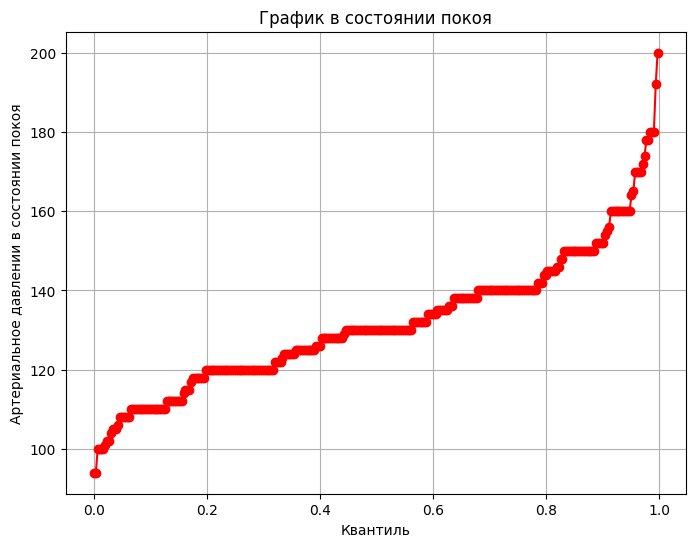

In [ ]:
sorted_trtbps = np.sort(trtbps_data)
quantiles = np.arange(0, 1, 1/len(trtbps_data))

plt.figure(figsize=(8, 6))
plt.plot(quantiles, sorted_trtbps, marker='o', linestyle='-', color='red')
plt.title('График в состоянии покоя')
plt.xlabel('Квантиль')
plt.ylabel('Артериальное давлении в состоянии покоя')
plt.grid(True)
plt.show()

## Наблюдение


1.   Давление начинает с уровня около 100 и плавно увеличивается до примерно 140 на 80-м процентиле.
2.   После 80-го процентиля наблюдается резкий рост артериального давления, достигающий максимальных значений.
3. Пациенты, чьё давление превышает 140, особенно те, кто приближается к верхним процентилям (90-100%), могут иметь повышенный риск развития сердечной недостаточности и других сердечно-сосудистых заболеваний.



In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(trtbps_data, dist="norm", plot=plt)
plt.grid(True)
plt.title('Вероятностный график')
plt.xlabel('Квантиль')
plt.ylabel('Значения')
plt.show()

NameError: name 'stats' is not defined

<Figure size 800x600 with 0 Axes>

## Наблюдение

1.  Точки данных хорошо выстраиваются вдоль красной линии, что указывает на то, что в этом диапазоне данные приближаются к нормальному распределению.
2.  Отклонение точек в правой части графика от красной линии свидетельствует о том, что распределение имеет положительную скошенность.
Может указывать на наличие выбросов или аномально высоких значений в данных.


## Карта корреляции

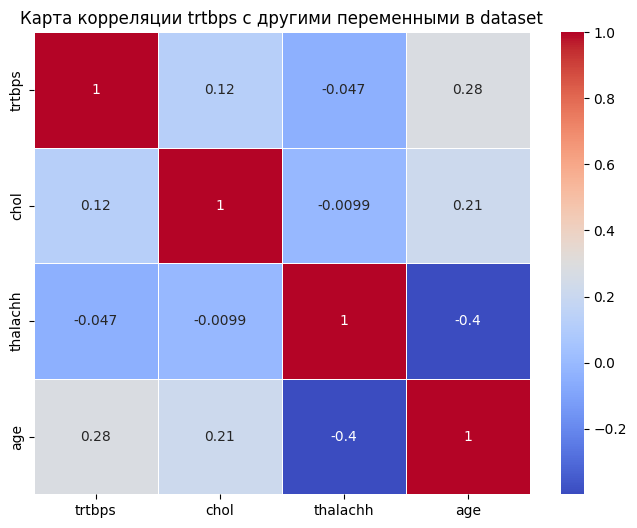

In [ ]:
corr_matrix = data[['trtbps', 'chol', 'thalachh', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Карта корреляции trtbps с другими переменными в dataset')
plt.show()


## Наблюдения

trtbps (артериальное давление в состоянии покоя)

chol (уровень холестерина)

thalachh (максимальная частота сердцебиения)

age (возраст)

*Корреляционные значения варьируются от -1 (полная обратная корреляция) до +1 (полная прямая корреляция), где значения близкие к 0 указывают на отсутствие или слабую корреляцию.*

**Корреляция между возрастом и максимальной частотой сердцебиения**
1.  Начение корреляции -0.4 указывает на умеренную обратную связь. Это означает, что с увеличением возраста максимальная частота сердцебиения, как правило, снижается.
**Корреляция между возрастом и артериальным давлением**
2.  Корреляция 0.28 свидетельствует о слабой положительной связи. Это может означать, что артериальное давление имеет тенденцию увеличиваться с возрастом.
**Корреляция между холестерином и возрастом**
1.  Слабая положительная корреляция 0.21 также указывает на то, что уровень холестерина может увеличиваться с возрастом.
**Корреляция между артериальным давлением и холестерином**
1.  Слабая положительная корреляция 0.12 предполагает незначительную связь между этими двумя показателями.
**Отсутствие значимой корреляции между максимальной частотой сердцебиения и холестерином**
1.  Значение корреляции -0.0099 практически равно нулю, что указывает на отсутствие связи между этими переменными.

In [2]:
# Путь к загруженному файлу
file_path = '/Users/daryaarestova/dev/LW-ML-for-Science/heart.csv'

# Чтение данных
data = pd.read_csv(file_path)


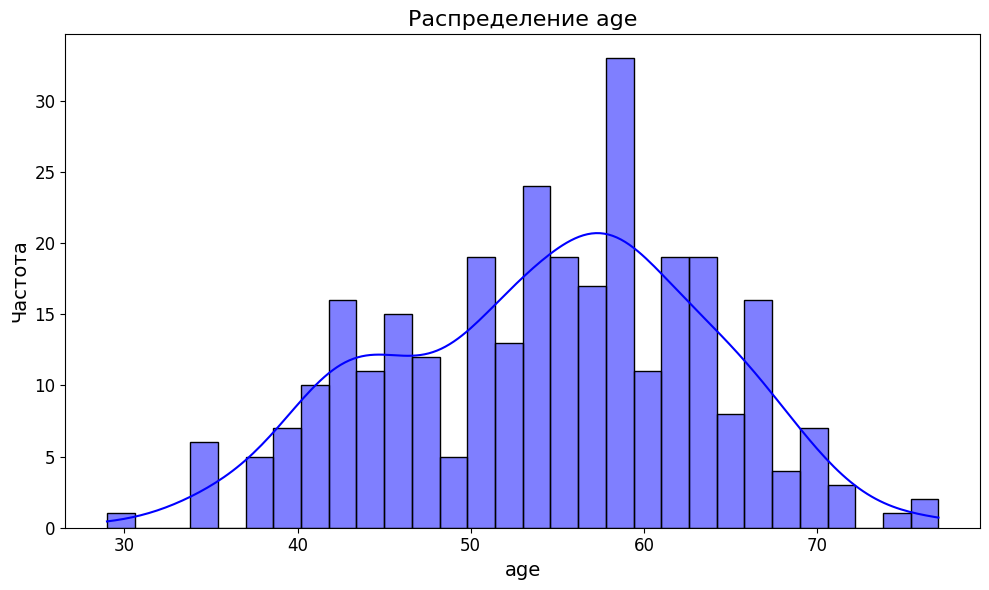

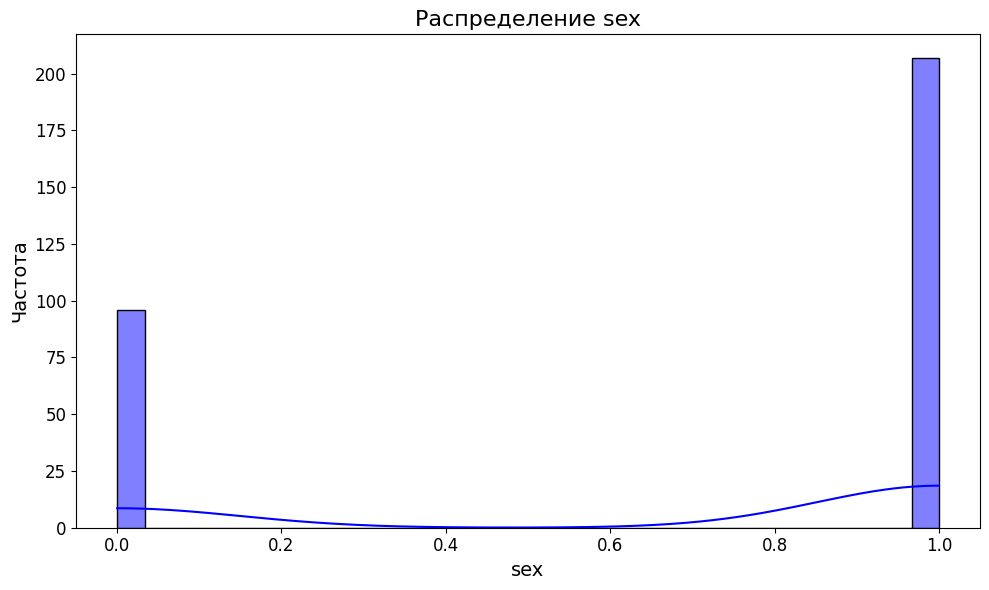

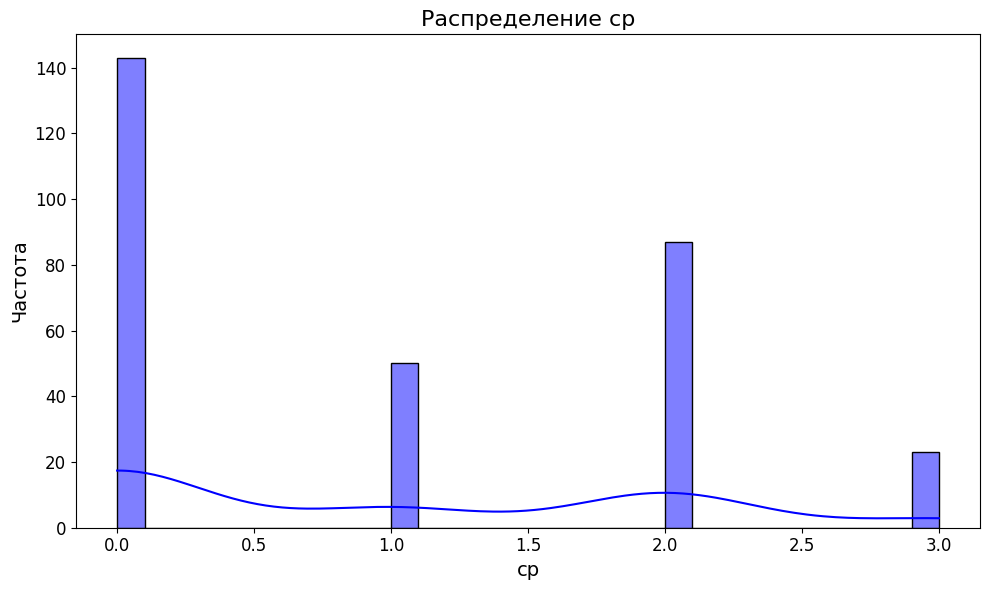

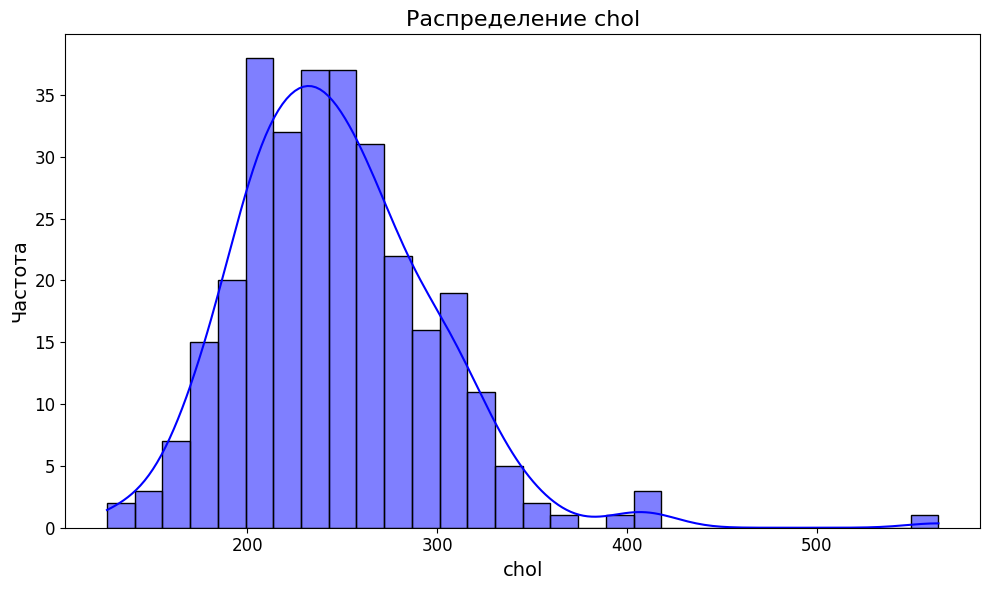

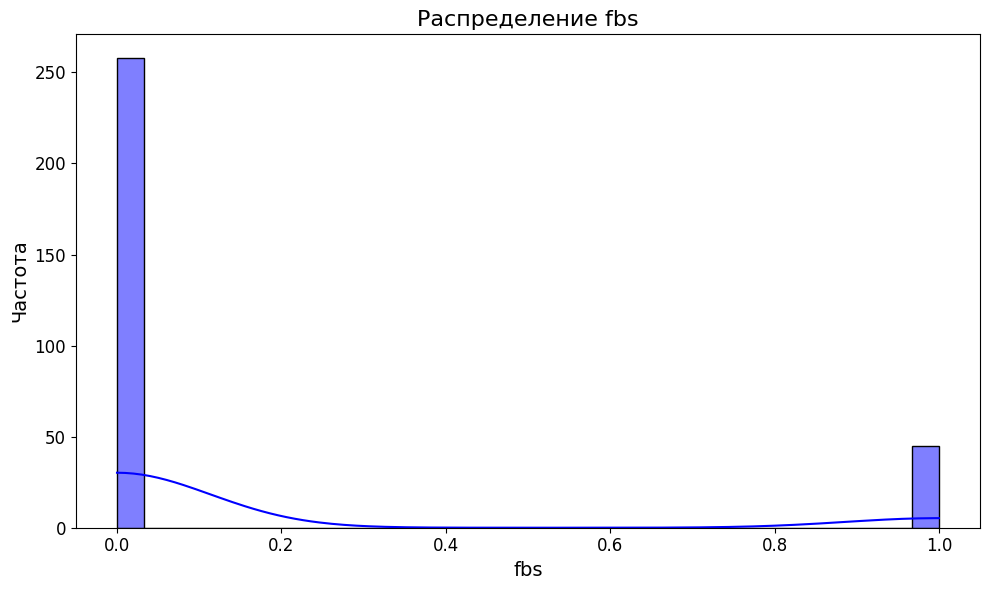

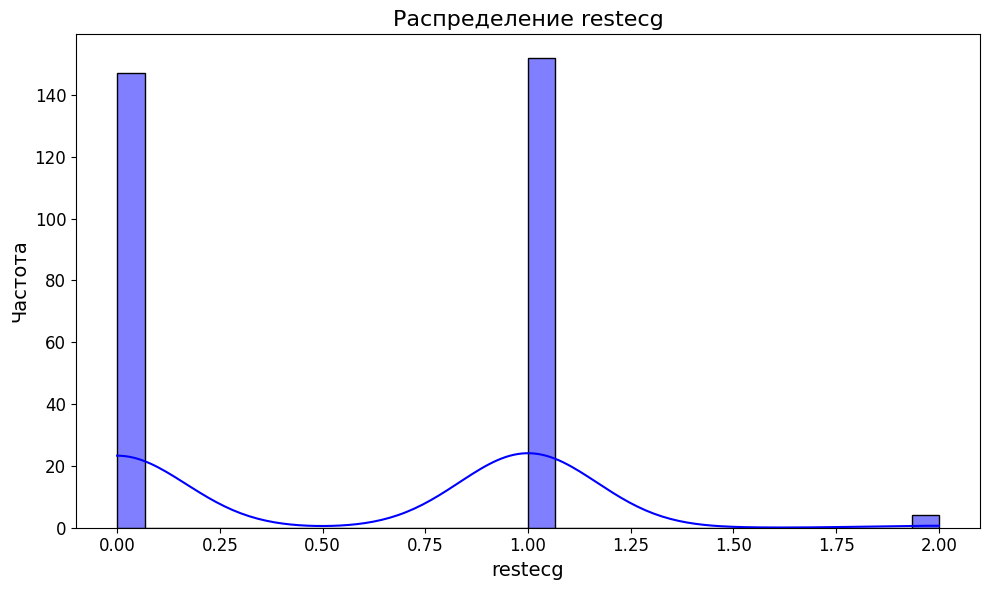

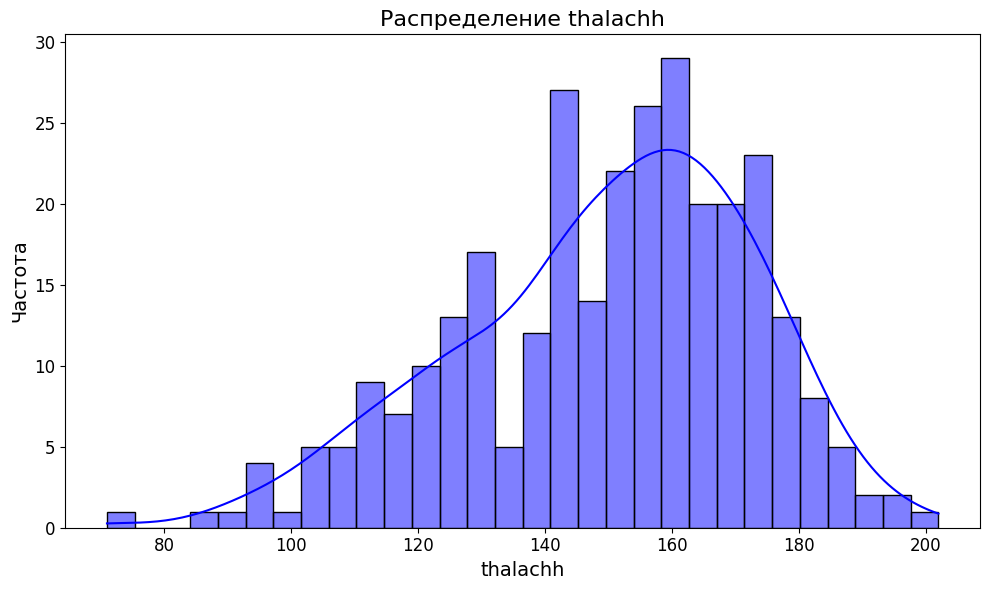

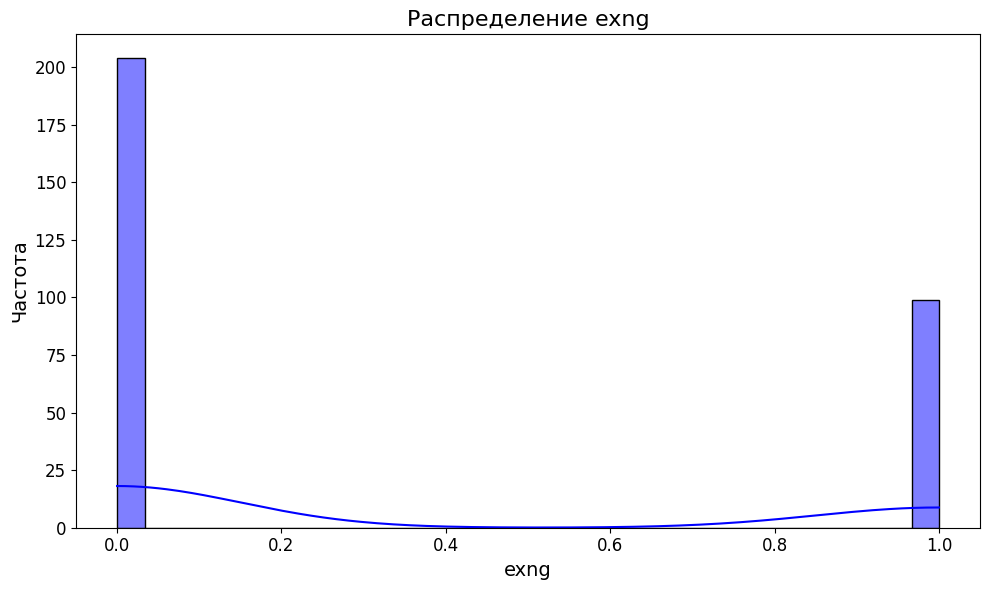

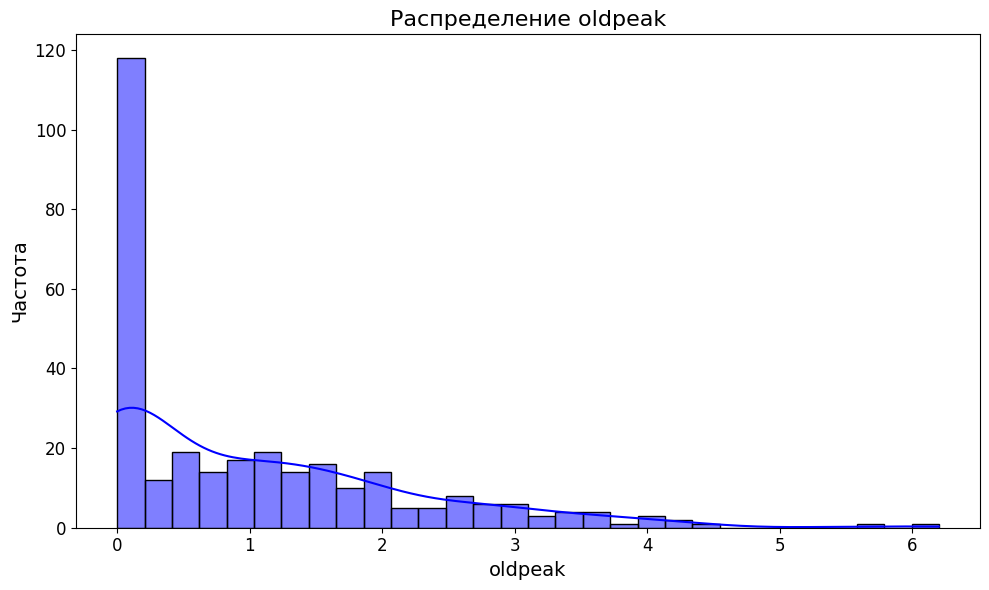

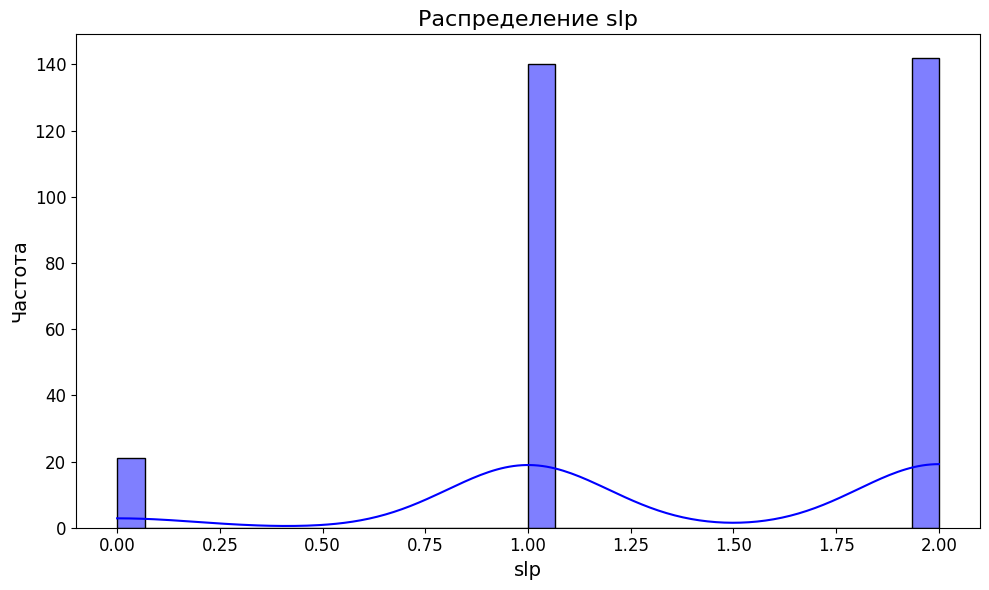

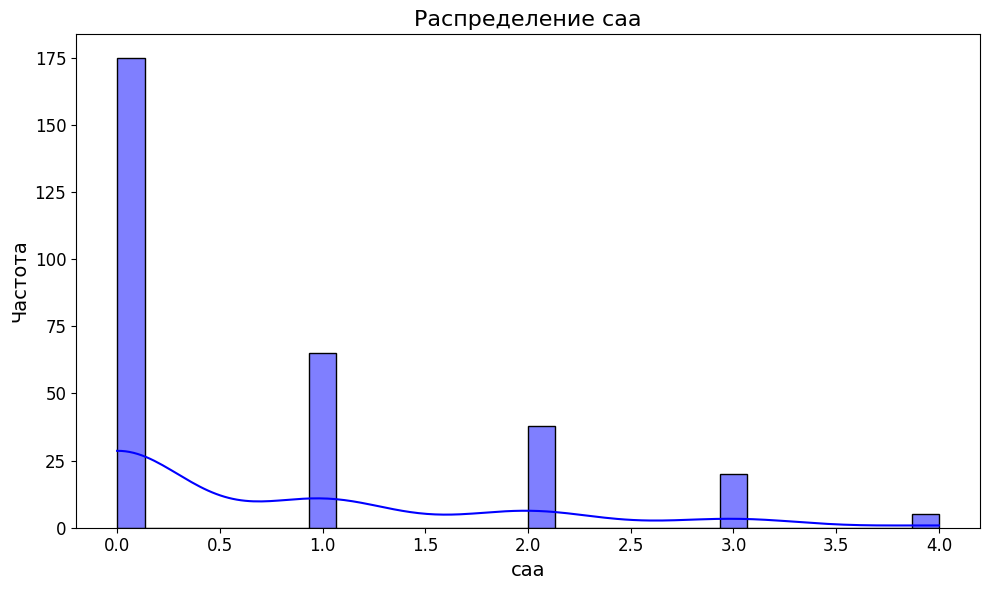

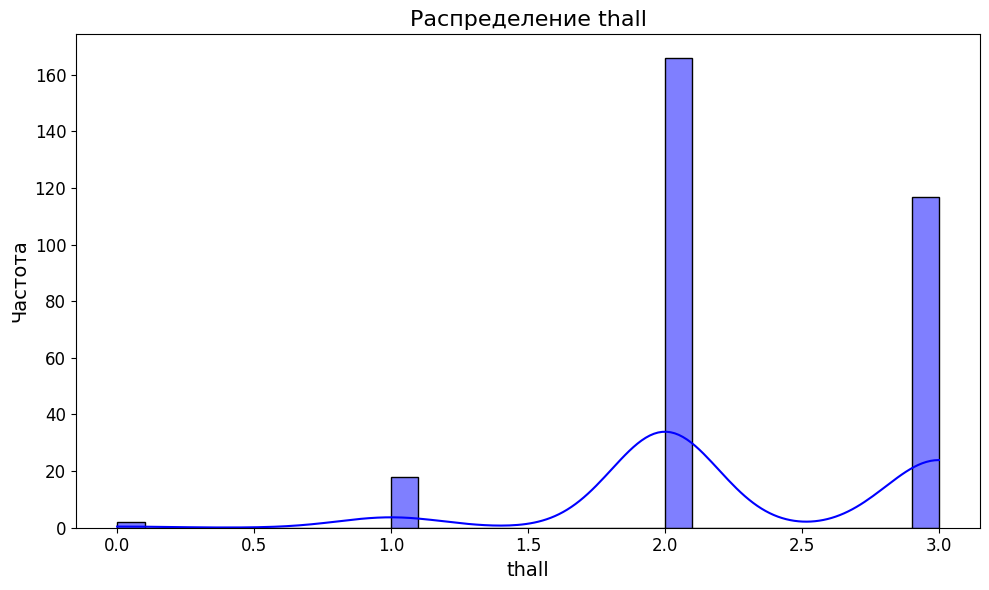

In [6]:
# Исключение колонки 'trtbps' из анализа
columns_to_analyze = [col for col in data.columns if col != 'trtbps' and col != 'output']

# Построение графиков распределения для каждого признака
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    if data[col].dtype in ['int64', 'float64']:                                             # Числовые признаки
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Распределение {col}', fontsize=16)
    else:                                                                                   # Категориальные признаки
        sns.countplot(x=data[col], order=data[col].value_counts().index, palette='viridis')
        plt.title(f'Распределение категорий {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

<h2>Наблюдения<h2>

**Числовые переменные (age, chol, thalachh, oldpeak)**


Распределения в основном близки к нормальному или слегка скошены.
Возраст (age) показывает пик в районе 55-60 лет


**Категориальные переменные (например, sex, cp, restecg)**


В некоторых категориях наблюдается явное доминирование одной из категорий.
В переменной sex большинство наблюдений относятся к категории 1, те можно сказать, что женщины больше подвержены сердечным приступам чем мужчины.

<h2>Максимальная частота сердечных сокращений<h2>

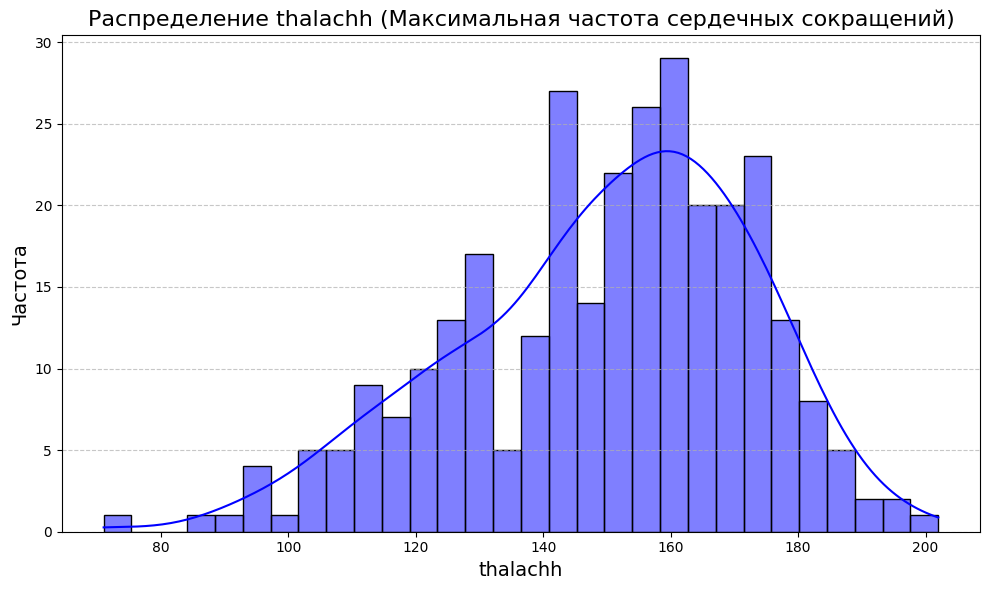

/var/folders/ww/y7s24j9d0gz3mfzgj1twl3940000gn/T/ipykernel_18694/463499943.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='thalachh', data=data, palette='Set2')


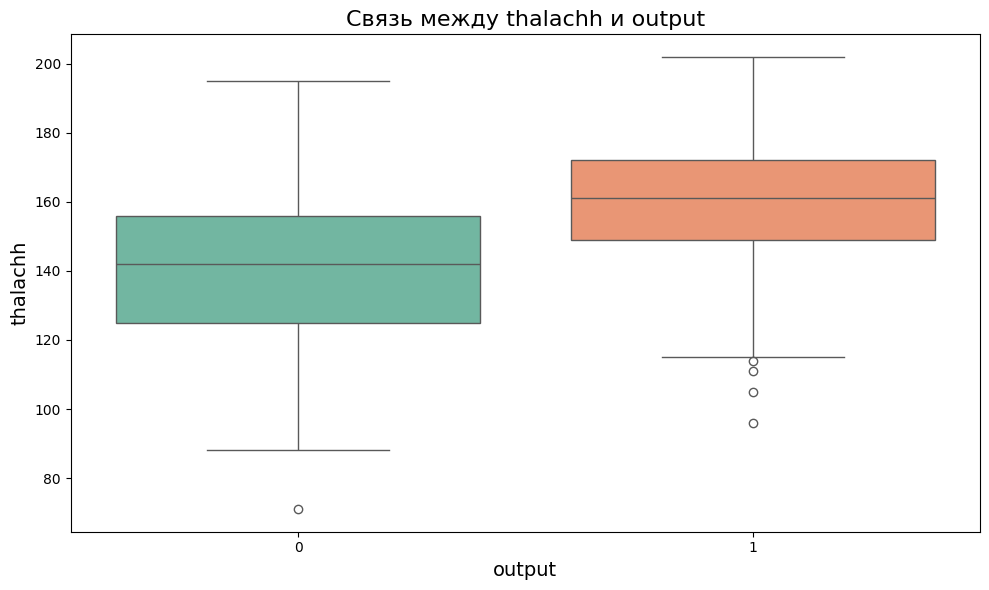

(count    303.000000
 mean     149.646865
 std       22.905161
 min       71.000000
 25%      133.500000
 50%      153.000000
 75%      166.000000
 max      202.000000
 Name: thalachh, dtype: float64,
 thalachh    1.000000
 output      0.421741
 slp         0.386784
 cp          0.295762
 restecg     0.044123
 fbs        -0.008567
 chol       -0.009940
 sex        -0.044020
 trtbps     -0.046698
 thall      -0.096439
 caa        -0.213177
 oldpeak    -0.344187
 exng       -0.378812
 age        -0.398522
 Name: thalachh, dtype: float64)

In [ ]:
# Описательная статистика
thalachh_stats = data['thalachh'].describe()

# Гистограмма распределения с KDE 
plt.figure(figsize=(10, 6))
sns.histplot(data['thalachh'], kde=True, bins=30, color='blue')
plt.title('Распределение thalachh (Максимальная частота сердечных сокращений)', fontsize=16)
plt.xlabel('thalachh', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Боксплот для анализа связи thalachh с output
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='thalachh', data=data, palette='Set2')
plt.title('Связь между thalachh и output', fontsize=16)
plt.xlabel('output', fontsize=14)
plt.ylabel('thalachh', fontsize=14)
plt.tight_layout()
plt.show()

# Корреляция с другими числовыми признаками
correlation_with_thalachh = data.corr()['thalachh'].sort_values(ascending=False)
thalachh_stats, correlation_with_thalachh

<h2>Наблюдения<h2>

Описательная статистика:


Среднее значение: 149.65


Стандартное отклонение: 22.91


Минимум: 71


Максимум: 202


Гистограмма распределения:


Распределение thalachh близко к нормальному, с небольшим смещением влево (в сторону меньших значений).


Связь с целевой переменной output


У людей с положительным диагнозом (output = 1) медиана thalachh выше (около 160), чем у людей с отрицательным диагнозом (output = 0), где медиана составляет около 140. Это подтверждает, что более высокая частота сердечных сокращений может быть связана с заболеванием.


Корреляция с другими признаками:


Наиболее сильные корреляции


output: положительная корреляция (0.42), что подтверждает связь.


slp: положительная корреляция (0.39) — наклон ST сегмента при нагрузке также может влиять на thalachh.


age: отрицательная корреляция (-0.40) — с возрастом максимальная частота сердечных сокращений уменьшается.


oldpeak: отрицательная корреляция (-0.34) — депрессия ST связана с более низким thalachh.

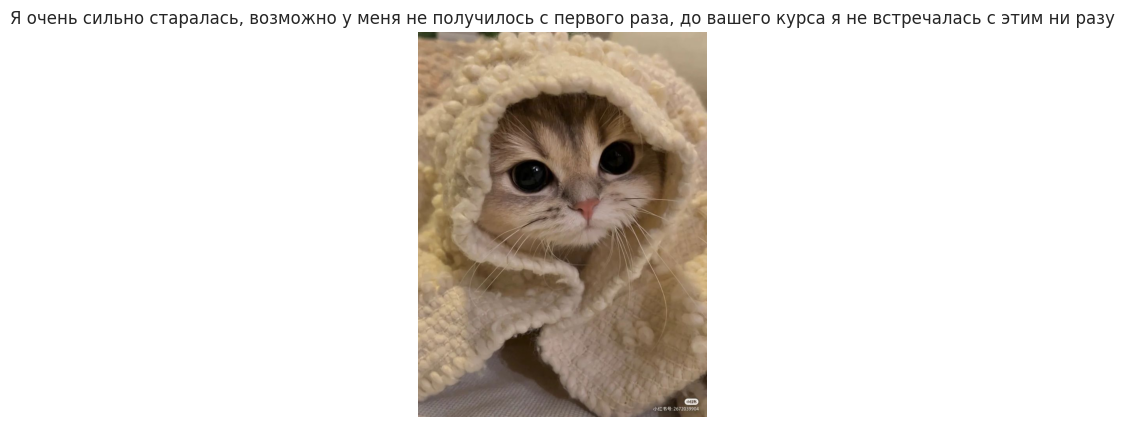

In [ ]:
with sns.axes_style("ticks"):

    plt.figure(figsize=(5, 5))
    plt.imshow(plt.imread('/content/drive/MyDrive/LB-ML/@elizzanes.jpg'))
    plt.title('Я очень сильно старалась, возможно у меня не получилось с первого раза, до вашего курса я не встречалась с этим ни разу')
    plt.axis('off')
    sns.despine();

